### 데이터
- 한국공항공사, 인천국제공항공사,「항공통계」, 2005.01, 2023.10.08, 항공사별 통계
- https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [7]:
!pip install koreanize-matplotlib

In [10]:
df_comp = pd.read_csv("../data/kosis_airline_200501_202308.csv", encoding='EUC-KR')

In [11]:
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3691,2023.08,에어로케이항공,출발,352,53311,306
3692,2023.08,에어프레미아,도착,126,35608,1474
3693,2023.08,에어프레미아,출발,125,35836,1690
3694,2023.08,외항사,도착,6705,1118720,52006


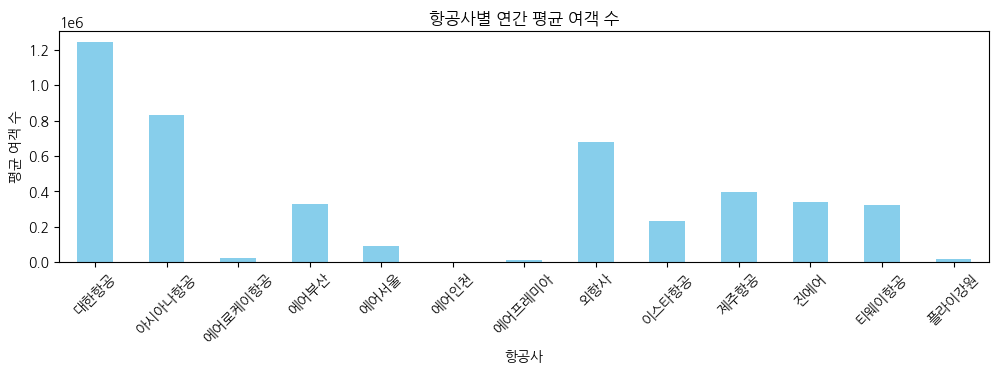

In [12]:
# 항공사별로 연간 평균 여객 수 계산
average_passengers_by_airline = df_comp.groupby("항공사별(1)")["여객 (명)"].mean()

# 그래프로 표시
plt.figure(figsize=(12, 3))
average_passengers_by_airline.plot(kind="bar", color="skyblue")
plt.title("항공사별 연간 평균 여객 수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()


### 연간 운항 및 여객 증가율 계산:
* 연간 운항 편수 및 여객 수의 증가율을 계산하여 항공사별로 비교합니다.

In [13]:
# 연간 운항 편수 증가율 계산
df_comp["운항 (편)_증가율"] = df_comp.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100

# 연간 여객 수 증가율 계산
df_comp["여객 (명)_증가율"] = df_comp.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율
0,2005.01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005.01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005.01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005.01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005.01,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3691,2023.08,에어로케이항공,출발,352,53311,306,0.000000,-1.503926
3692,2023.08,에어프레미아,도착,126,35608,1474,-2.325581,-7.574106
3693,2023.08,에어프레미아,출발,125,35836,1690,-0.793651,0.640306
3694,2023.08,외항사,도착,6705,1118720,52006,1.698771,5.884647


### 도착/출발별로 연간 운항 및 여객 분석:
* 도착과 출발별로 연간 운항 편수 및 여객 수를 분석합니다

In [14]:
# 도착별 연간 운항 편수 및 여객 수 분석
arrival_stats = df_comp[df_comp["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

# 출발별 연간 운항 편수 및 여객 수 분석
departure_stats = df_comp[df_comp["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

In [15]:
arrival_stats

,운항 (편),여객 (명)
시점,,
2005.01,18627,2607722
2005.02,17112,2451062
2005.03,18342,2462065
2005.04,18735,2823164
2005.05,19511,2836185
...,...,...
2023.04,31189,5233125
2023.05,33421,5529102
2023.06,33028,5618913


<AxesSubplot:xlabel='시점'>

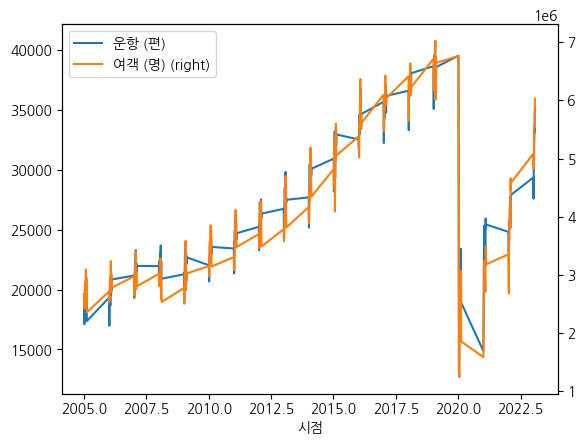

In [16]:
departure_stats.plot(secondary_y="여객 (명)")

### 시간에 따른 화물 운송량 시각화:
* 시간에 따른 화물 운송량의 추이를 시각화합니다.

In [17]:
# 시간에 따른 화물 운송량 시각화
df_comp["시점"] = pd.to_datetime(df_comp["시점"])  # 날짜 형식으로 변환

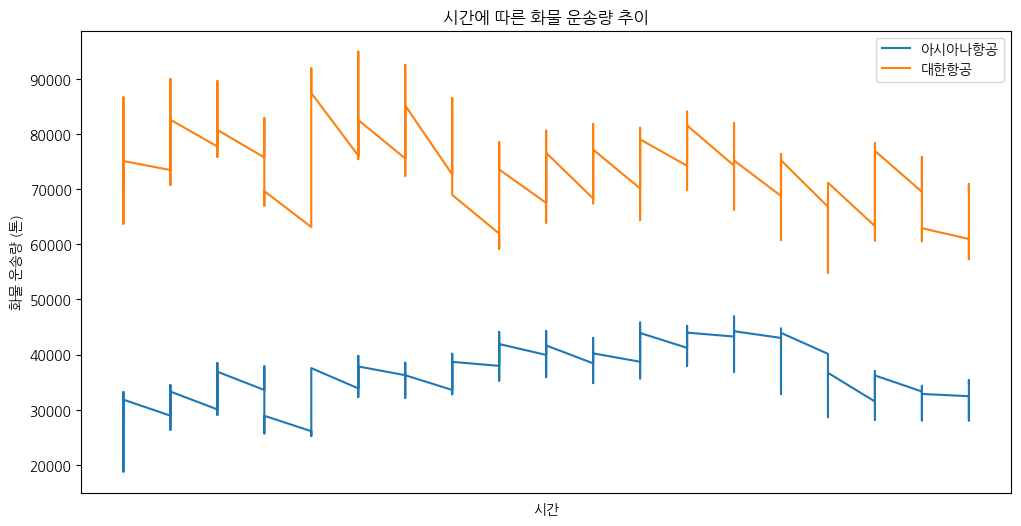

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["시점"], df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["화물 (톤)"], label="아시아나항공")
plt.plot(df_comp[df_comp["항공사별(1)"] == "대한항공"]["시점"], df_comp[df_comp["항공사별(1)"] == "대한항공"]["화물 (톤)"], label="대한항공")
plt.xlabel("시간")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("시간에 따른 화물 운송량 추이")
plt.show()

* 데이터를 다시 로드하여 df_comp 초기화

In [20]:
df_comp = pd.read_csv("../data/kosis_airline_200501_202308.csv", encoding="cp949", dtype={"시점": "object"})
df_comp

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3691,2023.08,에어로케이항공,출발,352,53311,306
3692,2023.08,에어프레미아,도착,126,35608,1474
3693,2023.08,에어프레미아,출발,125,35836,1690
3694,2023.08,외항사,도착,6705,1118720,52006


In [21]:
df_comp.columns = ['시점', '항공사', '도착출발', '운항_편', '여객_명', '화물_톤']
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤
0,2005.01,아시아나항공,도착,6613,791439,28012
1,2005.01,아시아나항공,출발,6610,799835,29576
2,2005.01,대한항공,도착,8869,1372897,70544
3,2005.01,대한항공,출발,8870,1405847,78329
4,2005.01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3691,2023.08,에어로케이항공,출발,352,53311,306
3692,2023.08,에어프레미아,도착,126,35608,1474
3693,2023.08,에어프레미아,출발,125,35836,1690
3694,2023.08,외항사,도착,6705,1118720,52006
